In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import tensorflow as tf
import tensorflow.keras as keras
import umap

In [2]:
DATA_PATH = 'data/'
DATASET = 'merged_data_clean.csv'

df = pd.read_csv(DATA_PATH + DATASET)

numeric_data = df.select_dtypes(include=[float, int])
scaled_data = StandardScaler().fit_transform(numeric_data)

reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_data)

umap_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
df = pd.concat([df, umap_df], axis=1)
score = df['Pounds of Food Distributed'] / df['TractLOWI']
min_score = np.min([val for val in score if val > 0.0])
imputed_score = np.array([min_score if val == 0.0 else val for val in score])
df['bank_score'] = pd.cut(np.log(imputed_score), bins=7, labels=False)

c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_ca

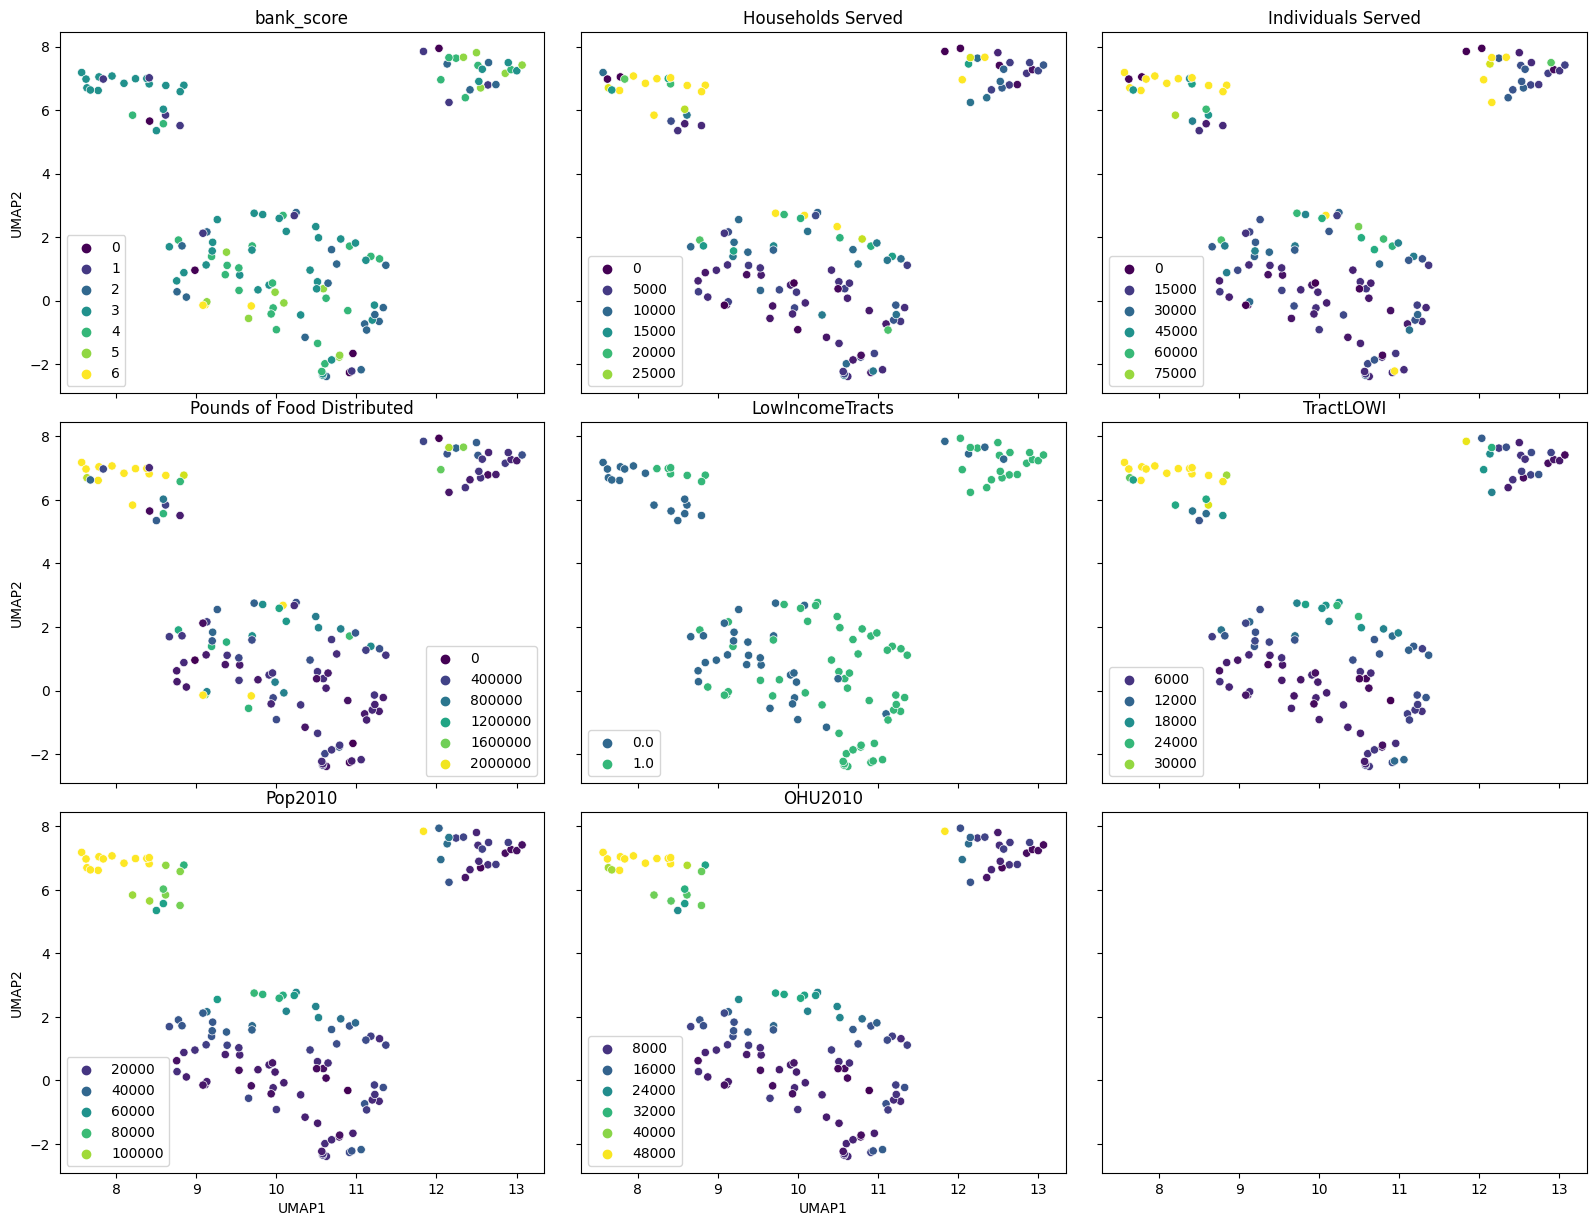

In [15]:
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

features_plotted = ['bank_score', 'Households Served', 'Individuals Served',
                    'Pounds of Food Distributed', 'LowIncomeTracts', 'TractLOWI', 
                    'Pop2010', 'OHU2010']

# fig = make_subplots(rows=2, cols=3, subplot_titles=features_plotted)
# for i, feature in enumerate(features_plotted):
#     fig.add_trace(
#         go.Scatter(x=df['UMAP1'], y=df['UMAP2'], mode='markers',
#                    marker=dict(color=df[feature], colorscale='viridis', opacity=0.5, showscale=True),
#                    showlegend=False),
#         row=i // 3 + 1, col=i % 3 + 1)
        
# fig.show()

fig, axs = plt.subplots(3, 3, figsize=(16, 12), sharex=True, sharey=True)
plt.tight_layout()
for i, feature in enumerate(features_plotted):
    ax = axs[i // 3][i % 3]
    scatter = sns.scatterplot(
        x='UMAP1', y='UMAP2', data=df, hue=feature,
        ax=ax, palette='viridis', legend='brief'
    )
    scatter.legend_.set_title(None)
    ax.set_title(feature)

plt.savefig('mult_scatter.png')

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto').fit(scaled_data)
df['cluster'] = kmeans.labels_
cluster_sizes = df.groupby('cluster').size()
df['weights'] = df['cluster'].apply(lambda x: 1 / cluster_sizes[x])

c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_i

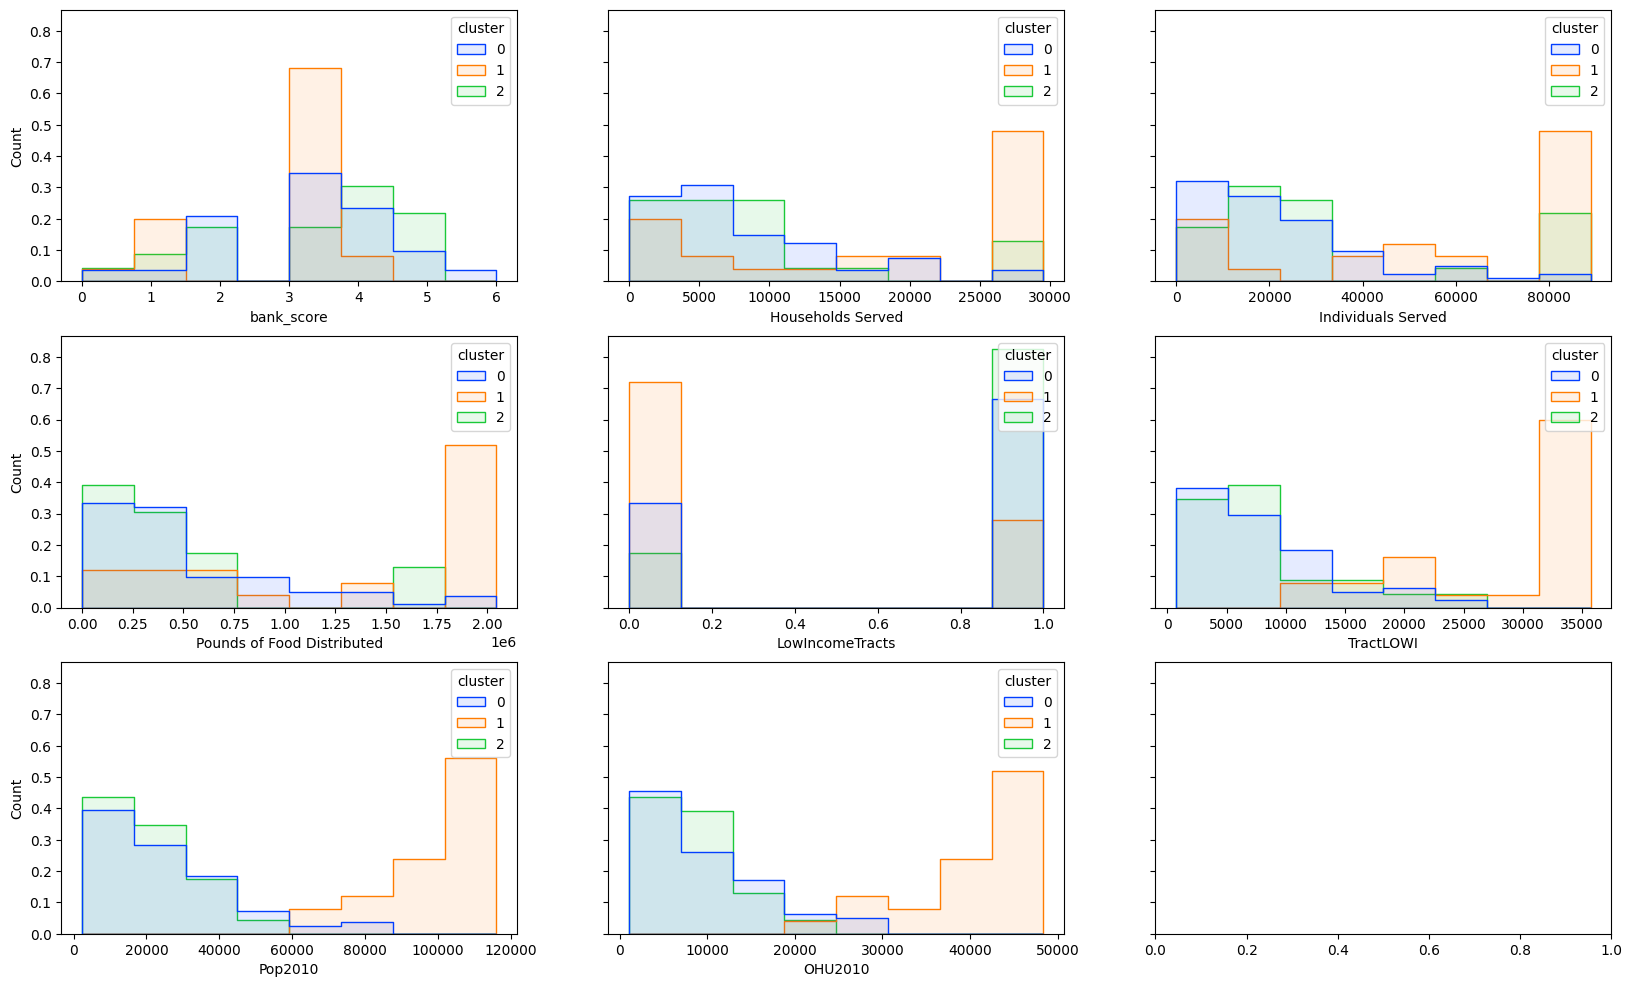

In [17]:
fig, axs = plt.subplots(3, 3, figsize=(20, 12), sharey=True)

for i, feature in enumerate(features_plotted):
    ax = axs[i // 3][i % 3]
    hist = sns.histplot(
        data=df, x=feature, bins=8, hue='cluster', ax=ax,
        element='step', palette='bright', weights='weights', alpha=0.1
    )
    # scatter.legend_.set_title(None)

plt.savefig('mult_hist.png')

In [18]:
# Use k-means to cluster data and plot distribution of bank scores by cluster
fig = px.histogram(
    df, x="bank_score", color="cluster",
    opacity=0.6, barmode='overlay', title="Distribution of Bank Scores by Cluster"
)
fig.show()
fig.write_image("umap_bank_score.png")

In [21]:
# Look at the UMAP x Feature Distributions for all features
import math
num_features = len(df.columns.tolist())
fig, axs = plt.subplots(math.ceil(num_features / 10), 10, figsize=(100, 100), sharey=True)

for i, feature in enumerate(df.columns.tolist()):
    ax = axs[i // 10][i % 10]
    hist = sns.histplot(
        data=df, x=feature, bins=8, hue='cluster', ax=ax,
        element='step', palette='bright', weights='weights', alpha=0.1
    )
    # scatter.legend_.set_title(None)

plt.savefig('umap_allfeats_hist.png')

c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_ca

In [19]:
# from umap.parametric_umap import ParametricUMAP
# reducer = ParametricUMAP(n_training_epochs=100)
# embedding = reducer.fit_transform(scaled_data)

# umap_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
# score = df['Pounds of Food Distributed'] / df['TractLOWI']
# min_score = np.min([val for val in score if val > 0.0])
# imputed_score = np.array([min_score if val == 0.0 else val for val in score])
# umap_df['bank_score'] = pd.cut(np.log(imputed_score), bins=7, labels=False)

# plt.figure()
# sns.scatterplot(
#     x="UMAP1", y="UMAP2",
#     hue="bank_score",
#     palette=sns.color_palette("viridis", as_cmap=True),
#     data=umap_df,
#     legend="auto"
# )

# plt.title("Parametric UMAP of Non-Encoded Data with Bank Score")